In [1]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
from minisom import MiniSom
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.shapelets import ShapeletModel, grabocka_params_to_shapelet_size_dict

In [2]:
from sklearn.metrics import silhouette_score

In [3]:
file_path = r'C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\SRS_Thesis_ShareFolder\_DATA\_AOIs\_CORNUDAS\_FIELD SPEC\Rock_Type_March2024\Igneous_Plotted_Data.csv'


df = pd.read_csv(file_path, delimiter=',')

df.head()

,Wavelength (nm),Average Reflectance,Field_ID,Ig_DER_Cluster_2,Ig_DER_3_Cluster
0,350,0.2823,CND005,0,2
1,351,0.2839,CND005,0,2
2,352,0.2806,CND005,0,2
3,353,0.2786,CND005,0,2
4,354,0.2786,CND005,0,2


In [4]:
# Extract unique field IDs
field_ids = df['Field_ID'].unique()

# Initialize an empty list to store individual time series
time_series_list = []

# Iterate over each unique field ID
for field_id in field_ids:
    # Extract time series data for the current field ID
    field_data = df[df['Field_ID'] == field_id]['Average Reflectance'].values
    
    # Get the maximum length of time series in the list
    max_sz = max(len(ts) for ts in time_series_list) if time_series_list else 0
    
    # Pad the time series data to make all time series equal-sized
    if len(field_data) < max_sz:
        padded_data = np.pad(field_data, (0, max_sz - len(field_data)), mode='constant', constant_values=np.nan)
    else:
        padded_data = field_data
    
    # Append padded time series data to the list
    time_series_list.append(padded_data)

# Convert the list of time series into a 3D NumPy array
time_series_array = np.array(time_series_list)

# Cast the 3D array to the required format for tslearn
time_series_dataset = to_time_series_dataset(time_series_array)

# time_series_dataset can now be used in tslearn for further analysis

In [5]:
print("Shape of time_series_data:", time_series_dataset.shape)
print("Number of samples:", time_series_dataset.shape[0])
print("Number of time series:", time_series_dataset.shape[1])
print("Number of timestamps per time series:", time_series_dataset.shape[2])

Shape of time_series_data: (41, 2151, 1)
Number of samples: 41
Number of time series: 2151
Number of timestamps per time series: 1


In [6]:
##45 samples, each containing 2151 time series, and each time series has 1 timestamp

Plotted 2151 data points for Field ID: CND005
Plotted 2151 data points for Field ID: CND012
Plotted 2151 data points for Field ID: CND014
Plotted 2151 data points for Field ID: CND017
Plotted 2151 data points for Field ID: CND019
Plotted 2151 data points for Field ID: CND027
Plotted 2151 data points for Field ID: CND028
Plotted 2151 data points for Field ID: CND029
Plotted 2151 data points for Field ID: CND035
Plotted 2151 data points for Field ID: CND036
Plotted 2151 data points for Field ID: CND043
Plotted 2151 data points for Field ID: CND105
Plotted 2151 data points for Field ID: CND107
Plotted 2151 data points for Field ID: CND109
Plotted 2151 data points for Field ID: CND111
Plotted 2151 data points for Field ID: CND114
Plotted 2151 data points for Field ID: CND115
Plotted 2151 data points for Field ID: CND116
Plotted 2151 data points for Field ID: CND121
Plotted 2151 data points for Field ID: CND123
Plotted 2151 data points for Field ID: CND124
Plotted 2151 data points for Field

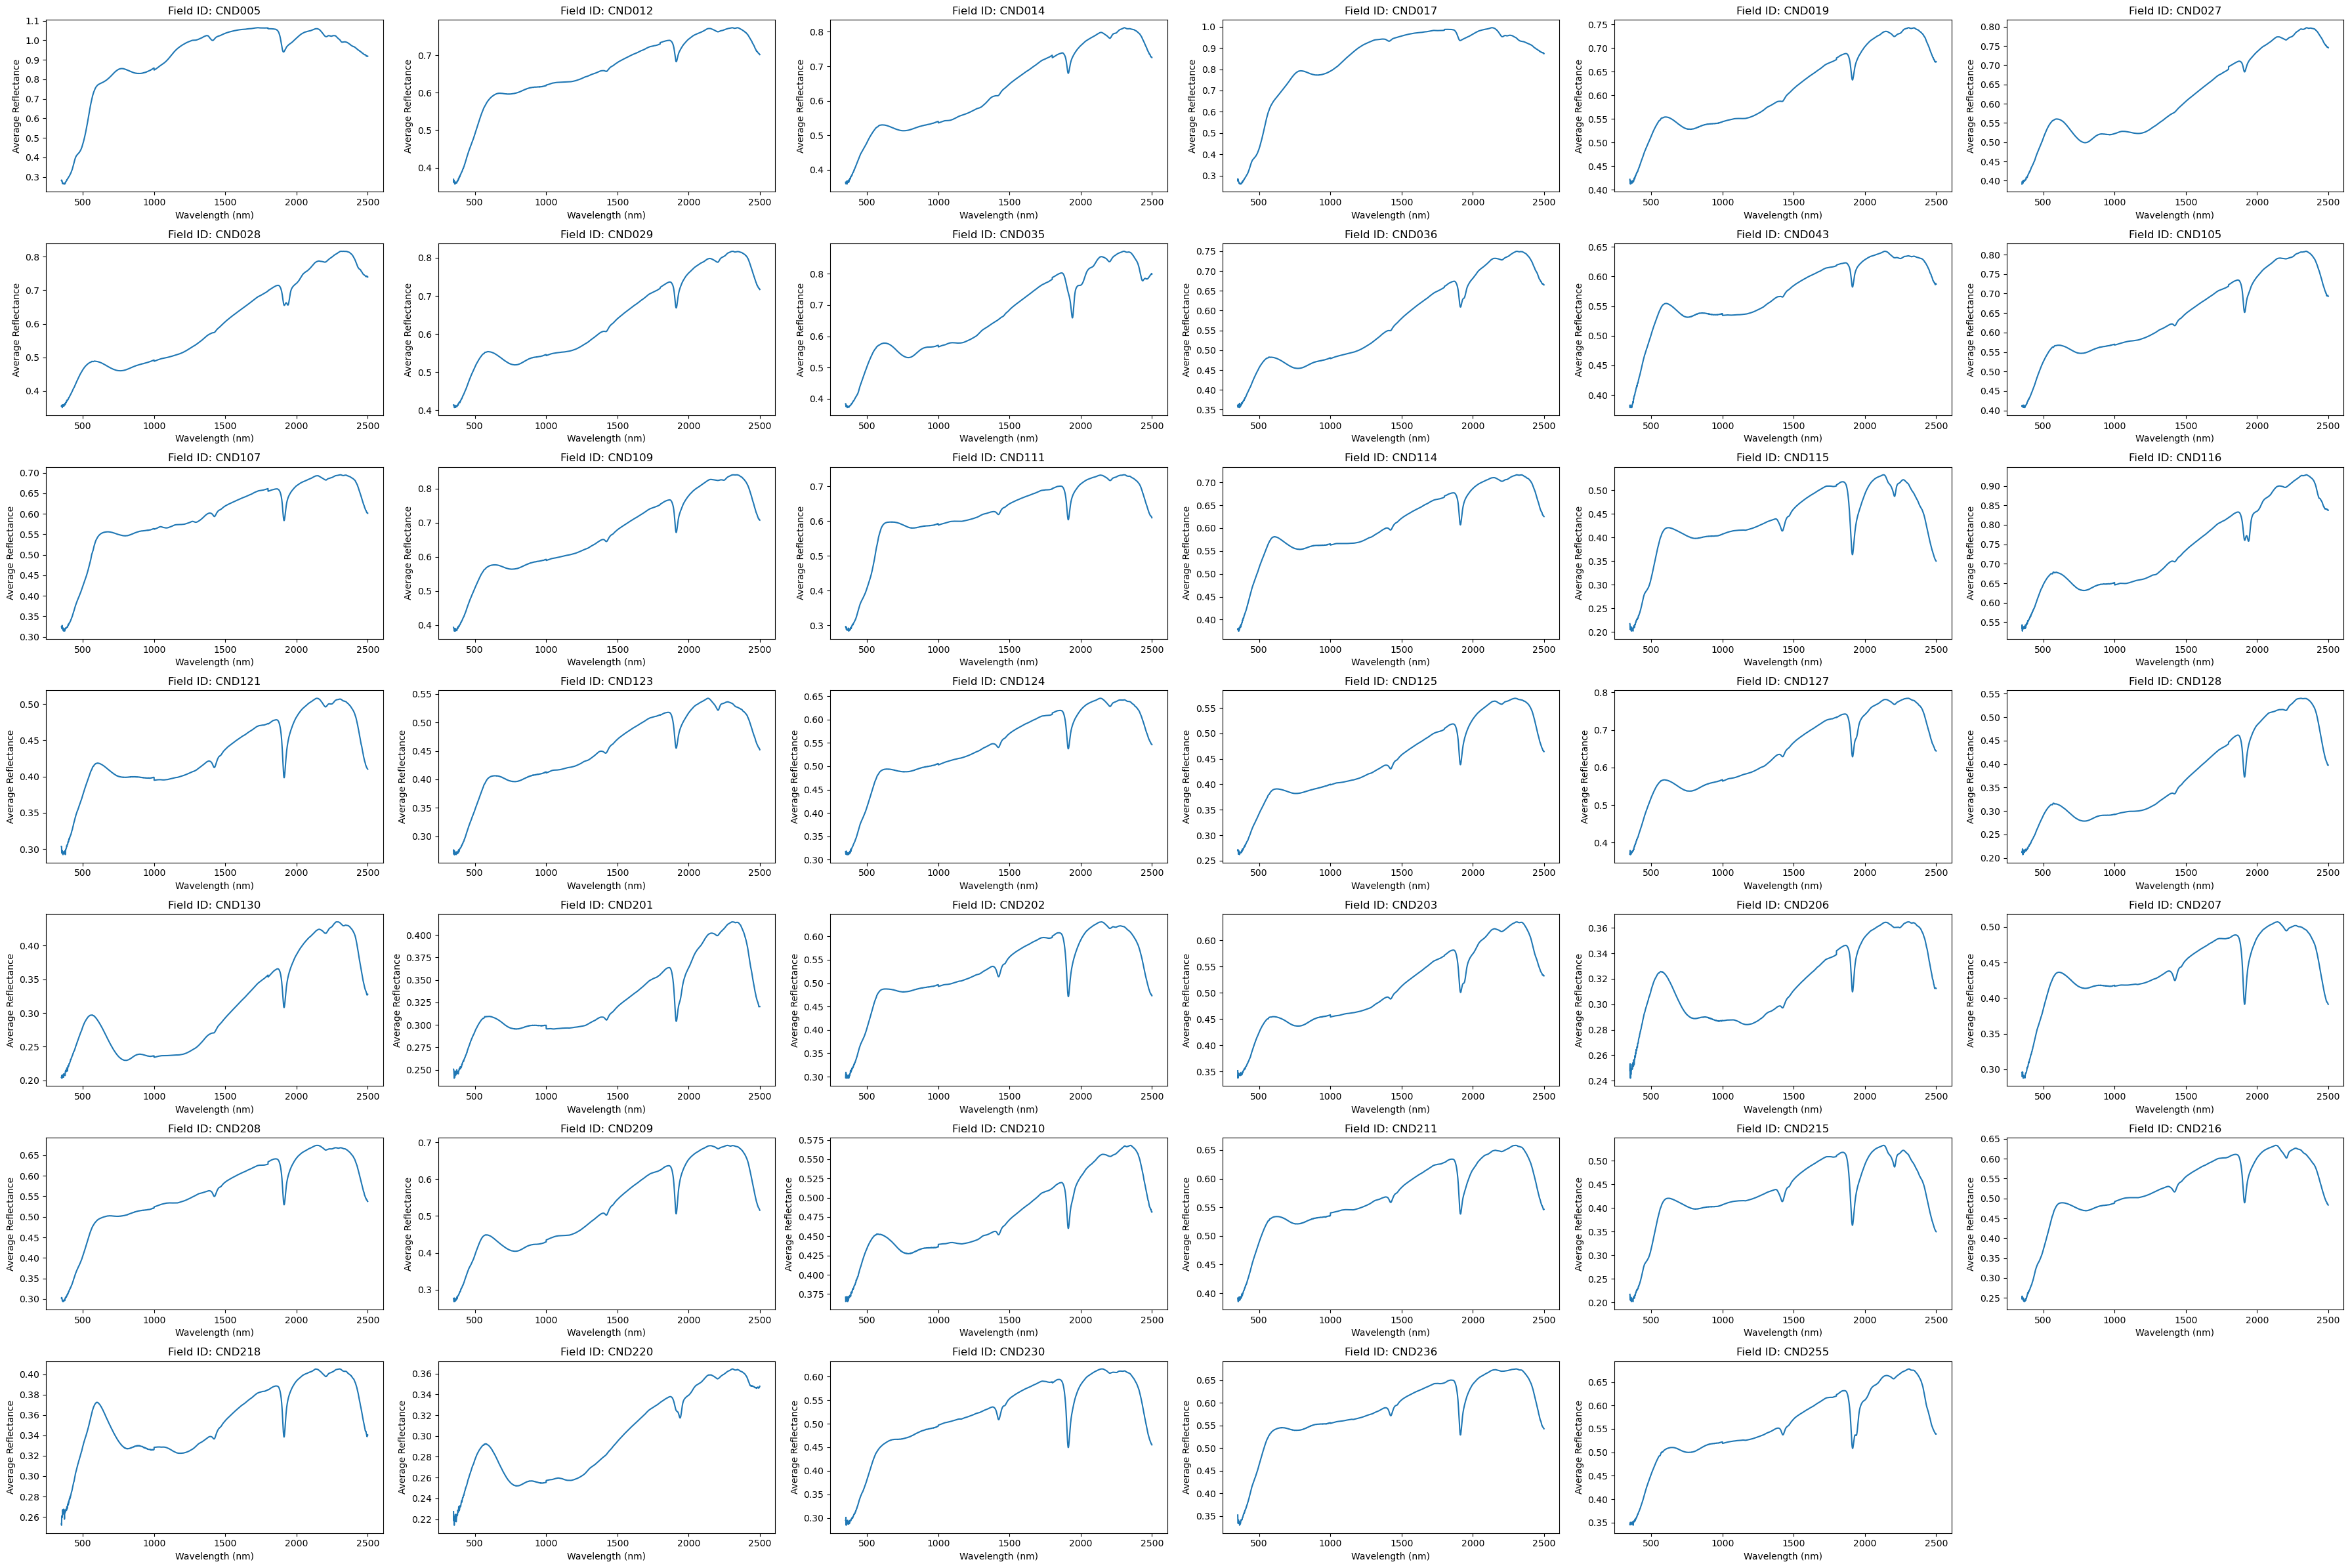

In [7]:
# Get the number of time series in the dataset
num_series = len(field_ids)

# Calculate the number of rows and columns for subplots
num_rows = int(np.ceil(np.sqrt(num_series)))
num_cols = int(np.ceil(num_series / num_rows))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(36, 24))

# Flatten axes array in case we have fewer subplots than needed
axes = axes.flatten()

# Plot each individual series
for i, field_id in enumerate(field_ids):
    # Find the rows corresponding to the current field_id
    rows = df[df['Field_ID'] == field_id]
    # Extract wavelength and reflectance data
    wavelengths = rows['Wavelength (nm)']
    reflectance = rows['Average Reflectance']
    # Plot the corresponding time series
    axes[i].plot(wavelengths, reflectance)
    axes[i].set_title(f"Field ID: {field_id}")
    axes[i].set_xlabel("Wavelength (nm)")
    axes[i].set_ylabel("Average Reflectance")
    print(f"Plotted {len(wavelengths)} data points for Field ID: {field_id}")

# Remove empty subplots
for i in range(len(field_ids), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

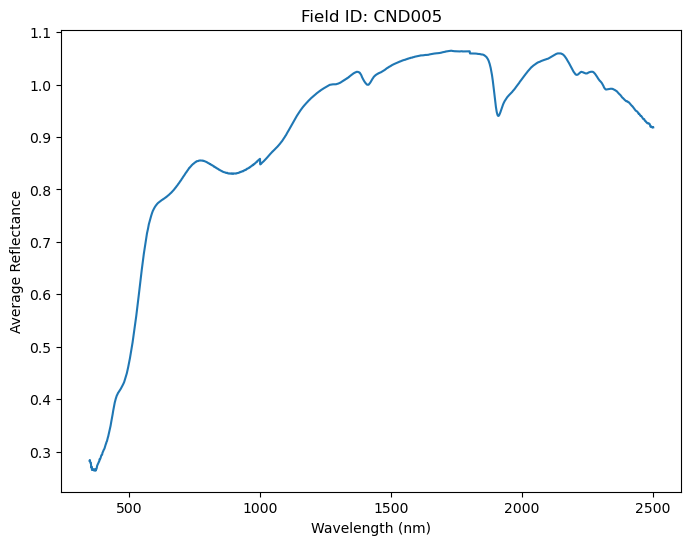

Plotted 2151 data points for Field ID: CND005


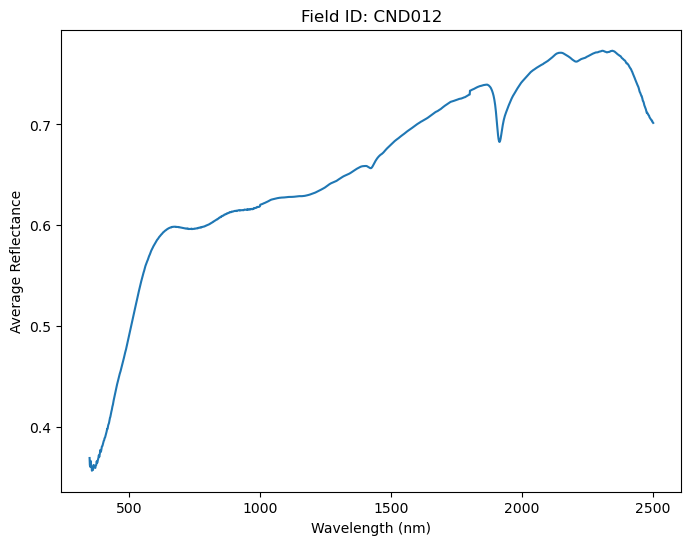

Plotted 2151 data points for Field ID: CND012


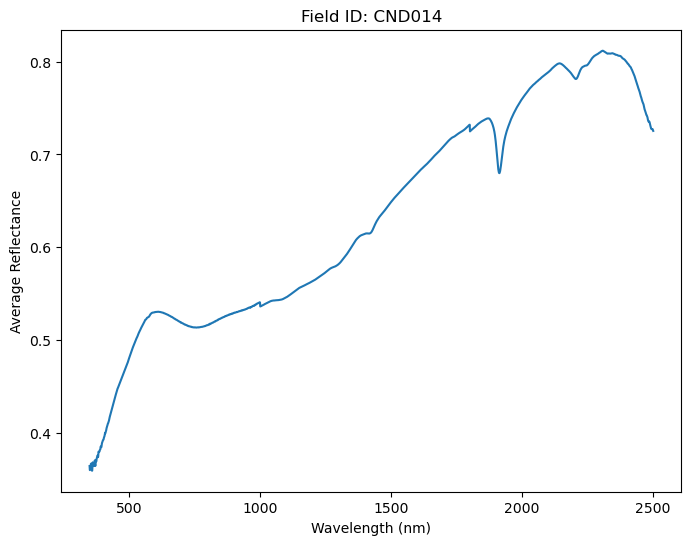

Plotted 2151 data points for Field ID: CND014


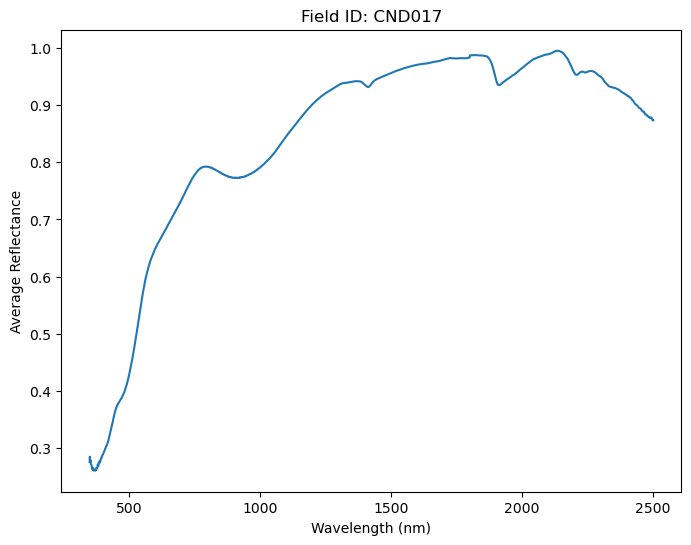

Plotted 2151 data points for Field ID: CND017


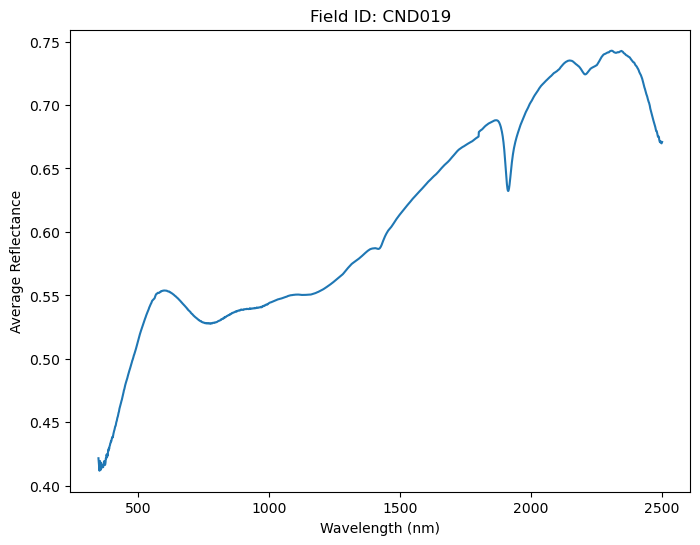

Plotted 2151 data points for Field ID: CND019


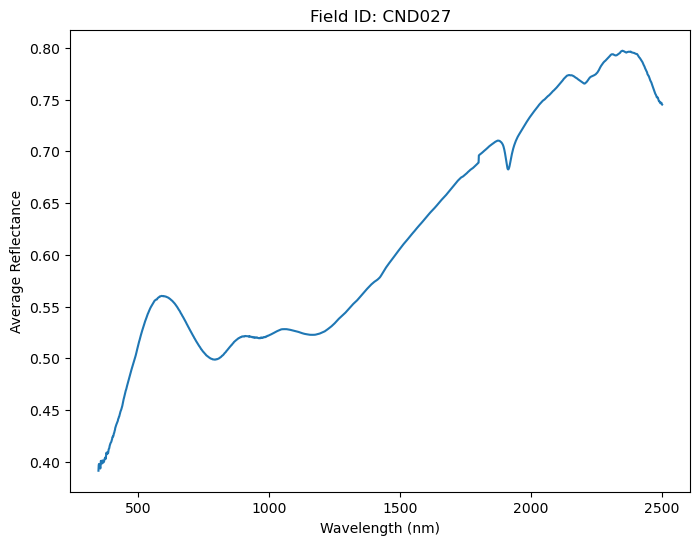

Plotted 2151 data points for Field ID: CND027


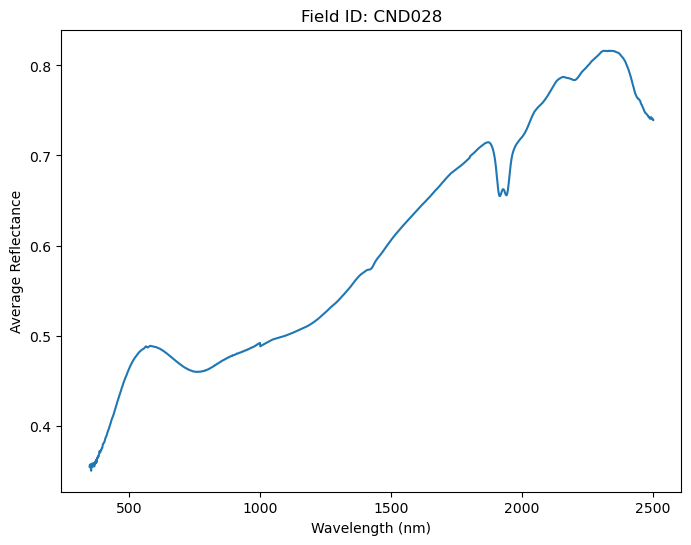

Plotted 2151 data points for Field ID: CND028


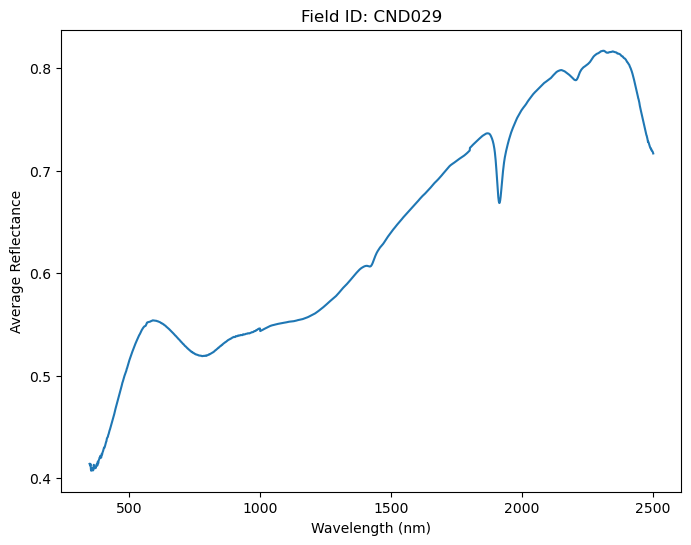

Plotted 2151 data points for Field ID: CND029


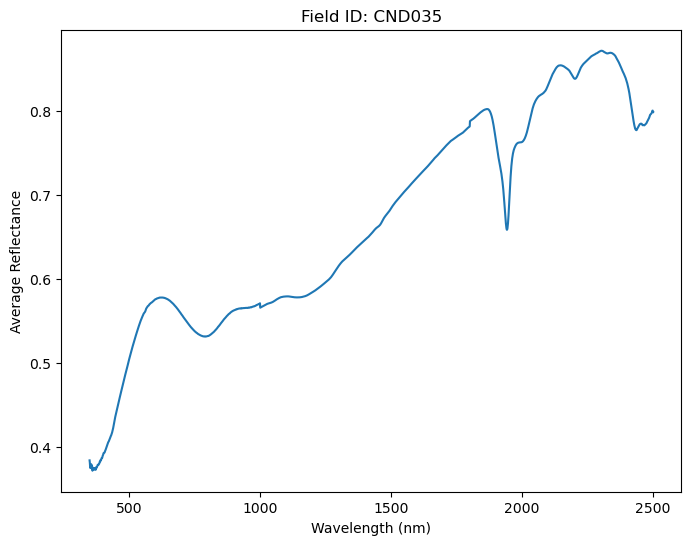

Plotted 2151 data points for Field ID: CND035


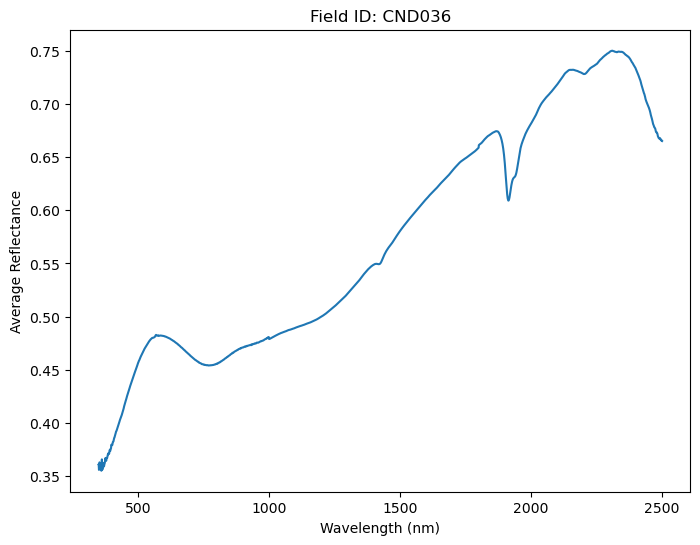

Plotted 2151 data points for Field ID: CND036


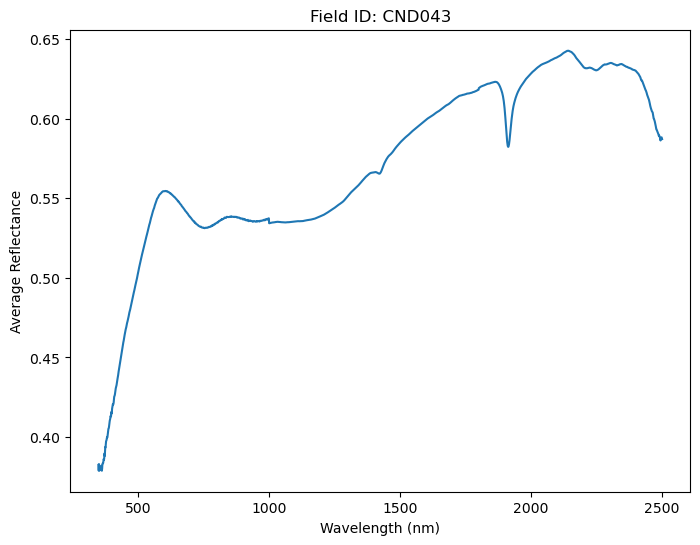

Plotted 2151 data points for Field ID: CND043


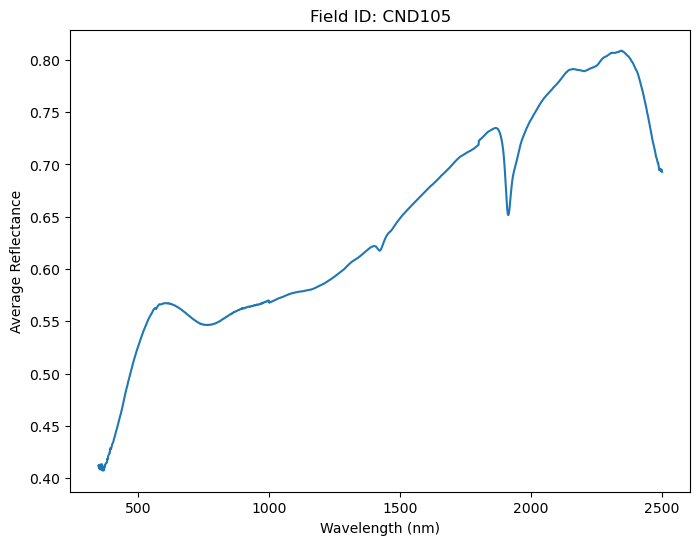

Plotted 2151 data points for Field ID: CND105


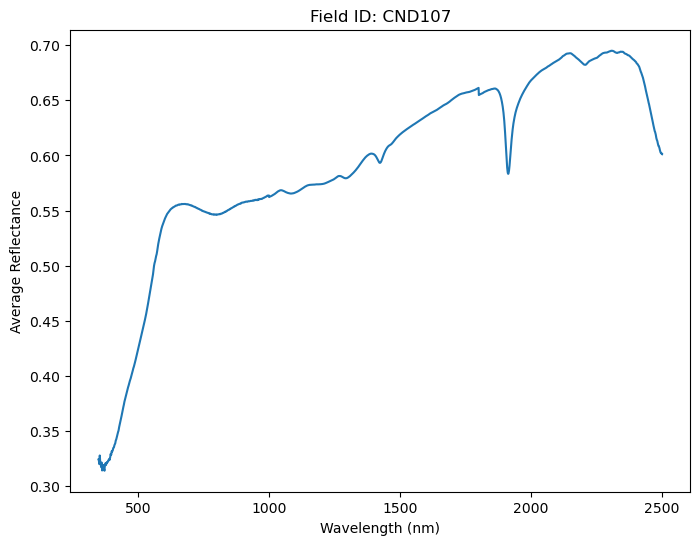

Plotted 2151 data points for Field ID: CND107


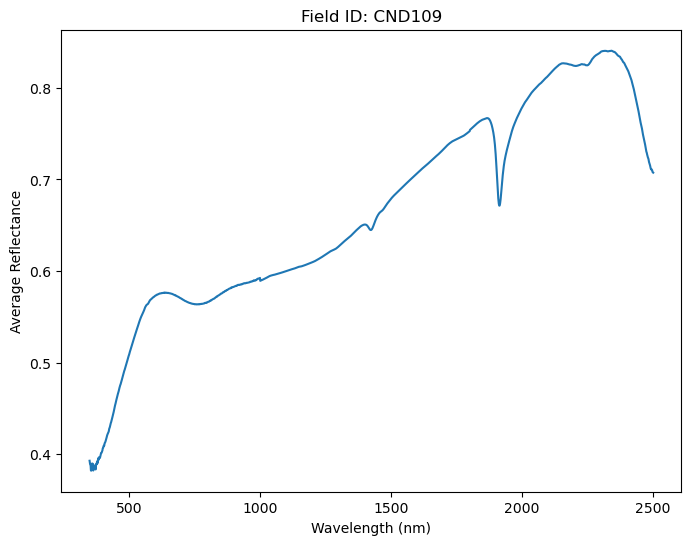

Plotted 2151 data points for Field ID: CND109


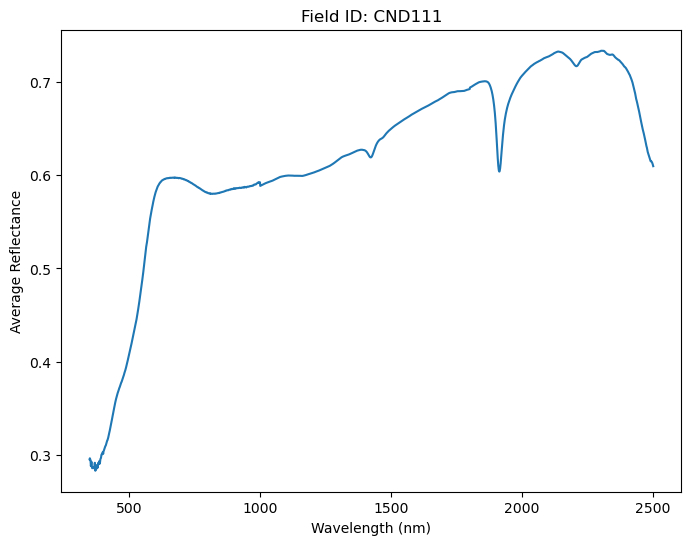

Plotted 2151 data points for Field ID: CND111


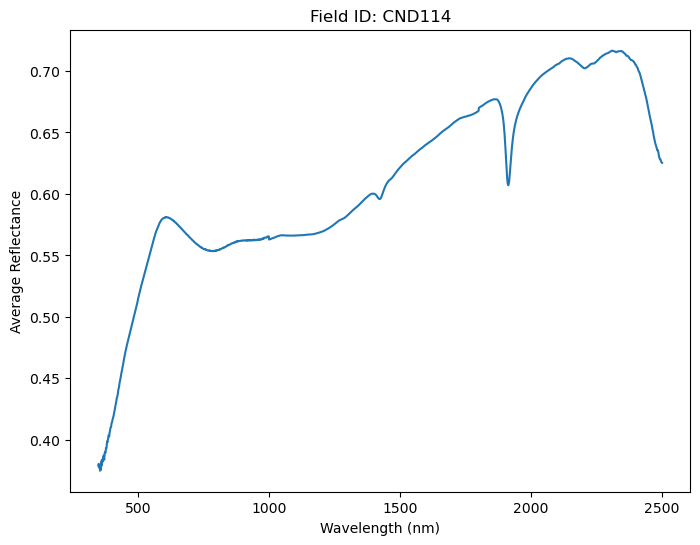

Plotted 2151 data points for Field ID: CND114


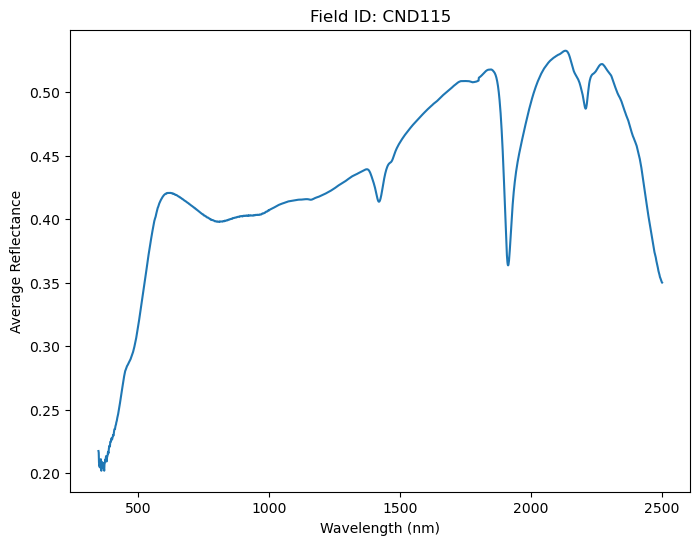

Plotted 2151 data points for Field ID: CND115


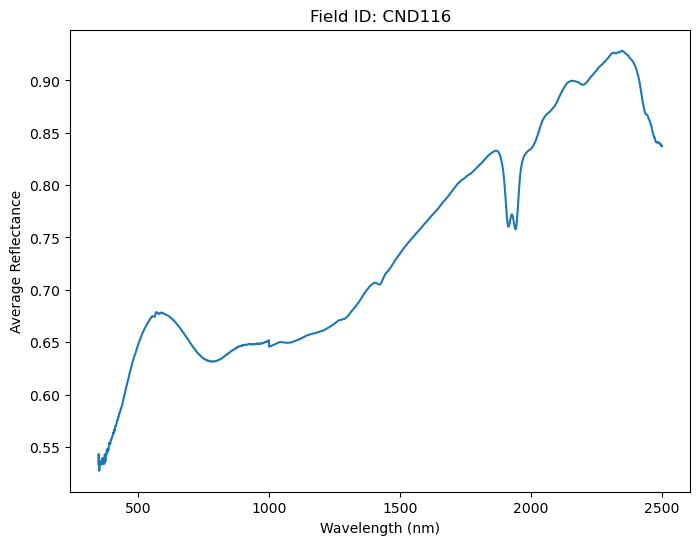

Plotted 2151 data points for Field ID: CND116


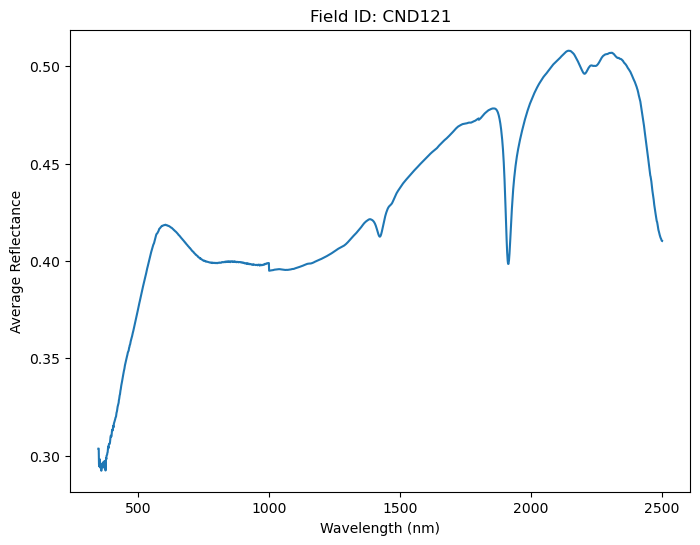

Plotted 2151 data points for Field ID: CND121


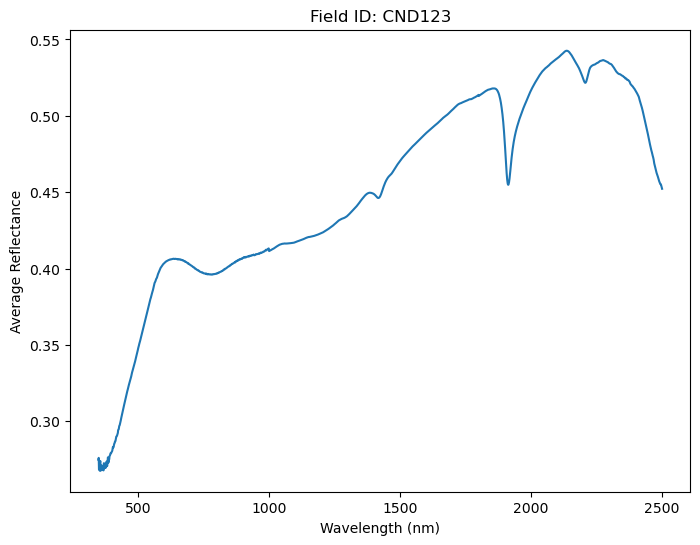

Plotted 2151 data points for Field ID: CND123


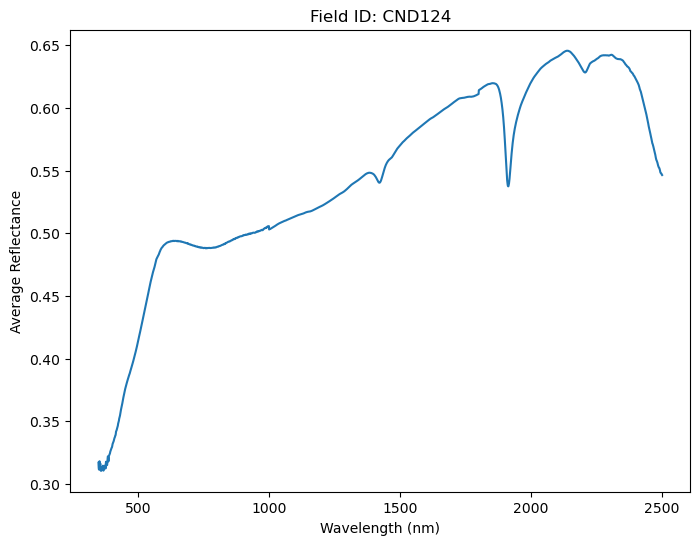

Plotted 2151 data points for Field ID: CND124


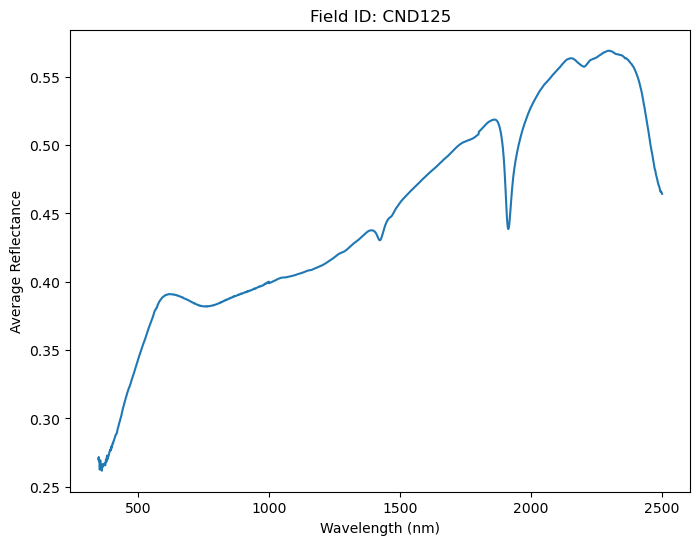

Plotted 2151 data points for Field ID: CND125


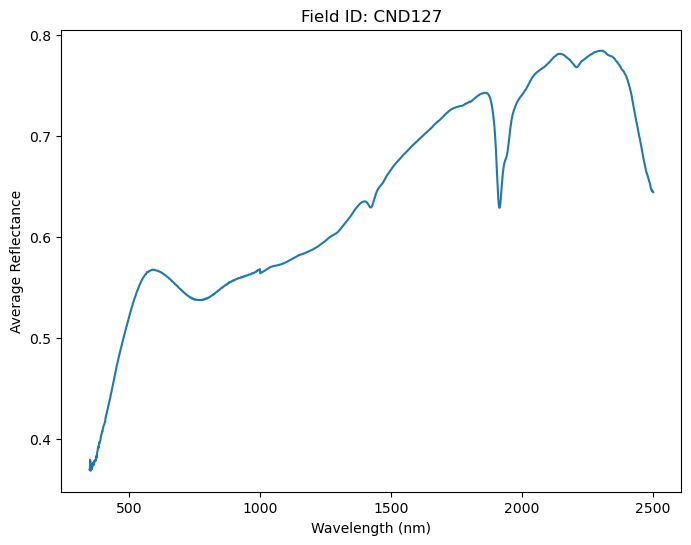

Plotted 2151 data points for Field ID: CND127


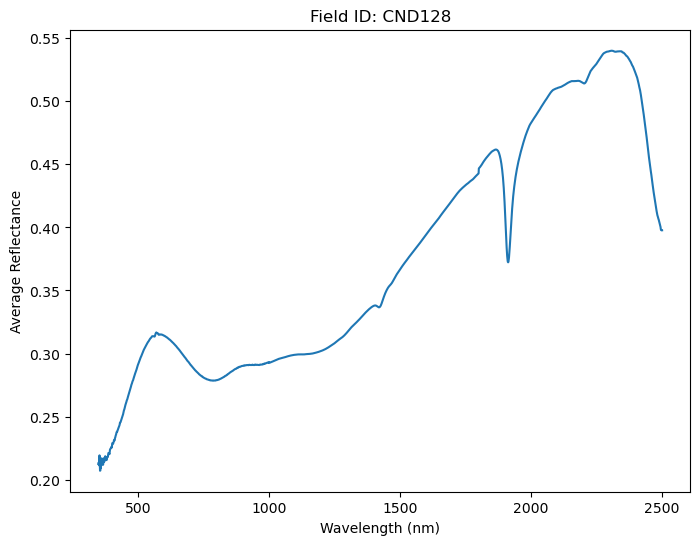

Plotted 2151 data points for Field ID: CND128


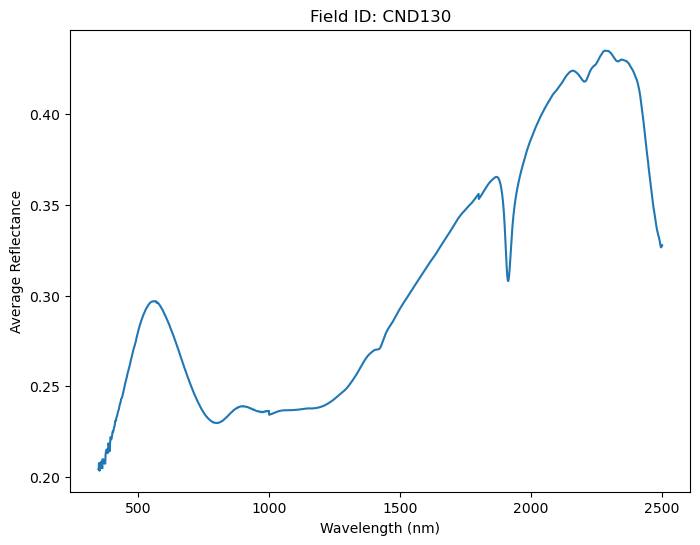

Plotted 2151 data points for Field ID: CND130


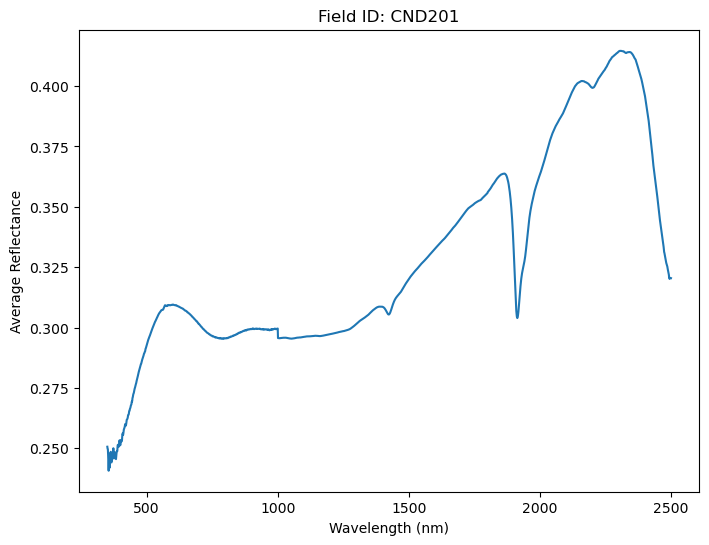

Plotted 2151 data points for Field ID: CND201


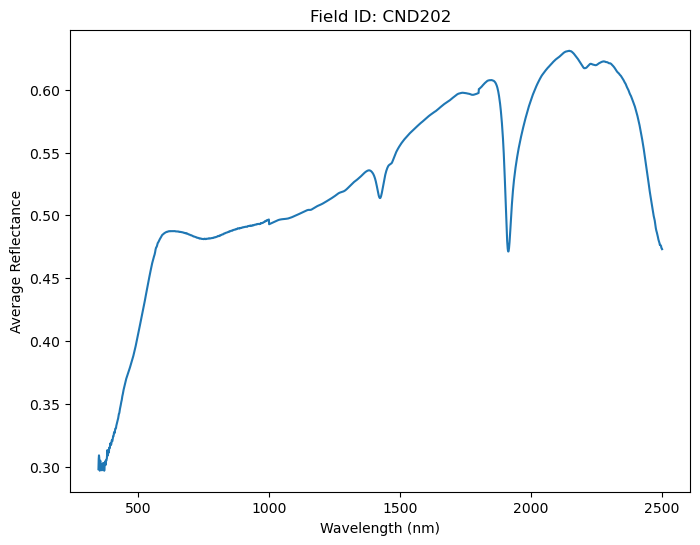

Plotted 2151 data points for Field ID: CND202


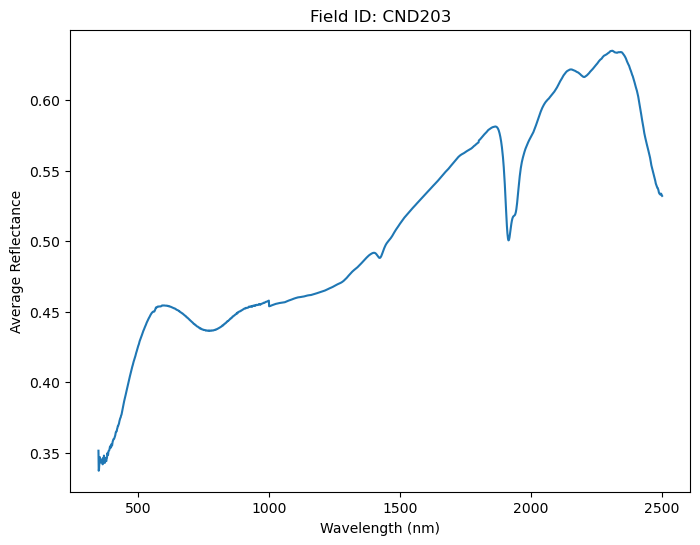

Plotted 2151 data points for Field ID: CND203


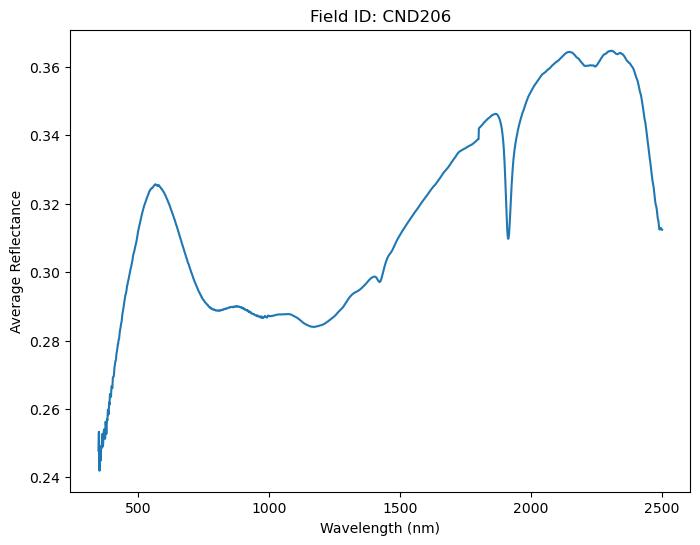

Plotted 2151 data points for Field ID: CND206


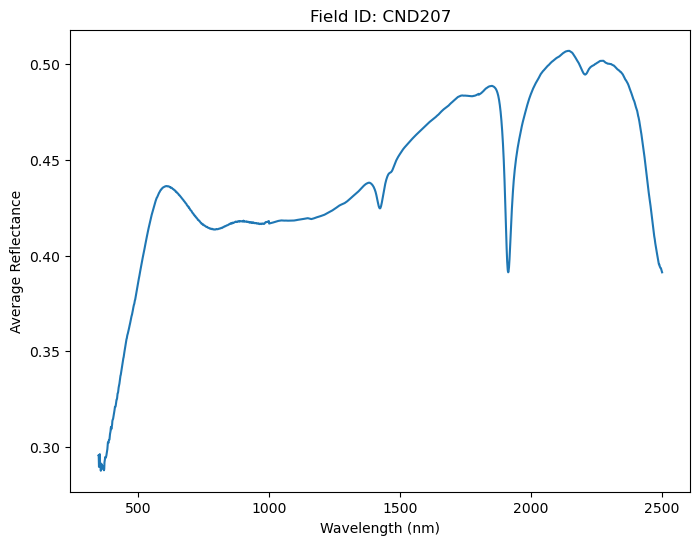

Plotted 2151 data points for Field ID: CND207


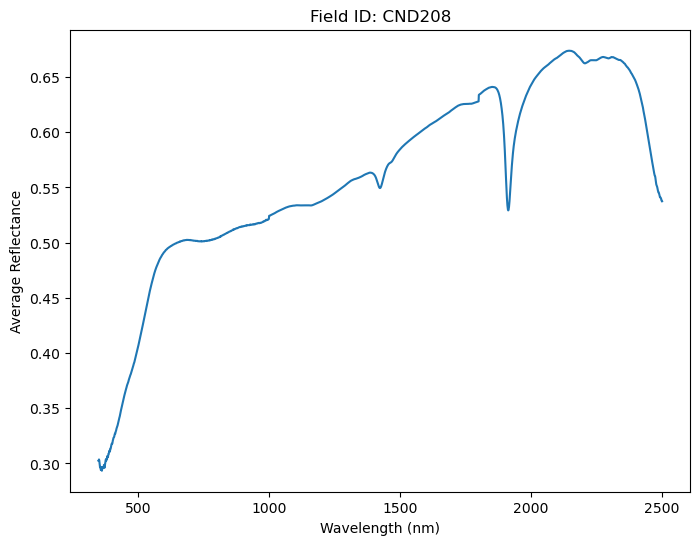

Plotted 2151 data points for Field ID: CND208


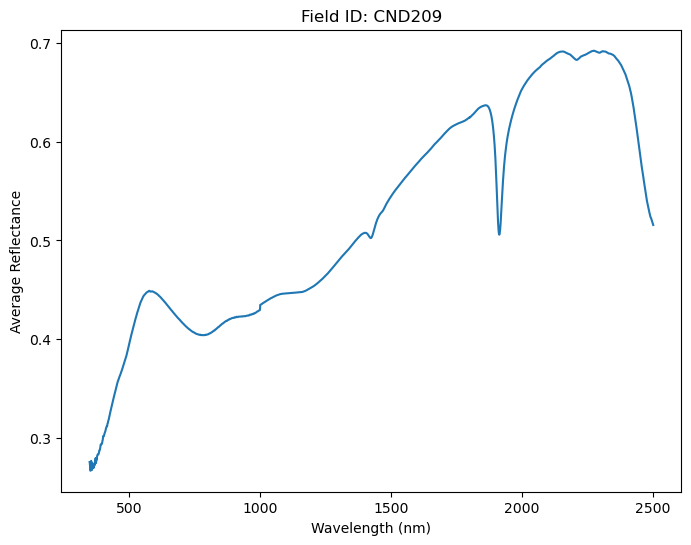

Plotted 2151 data points for Field ID: CND209


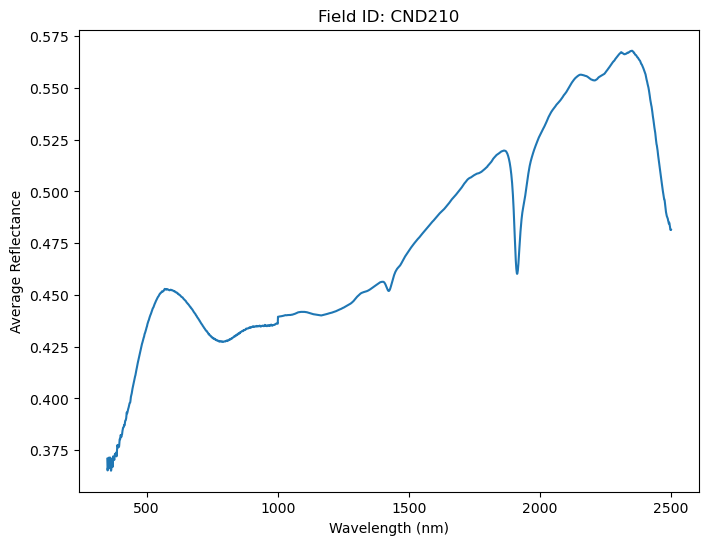

Plotted 2151 data points for Field ID: CND210


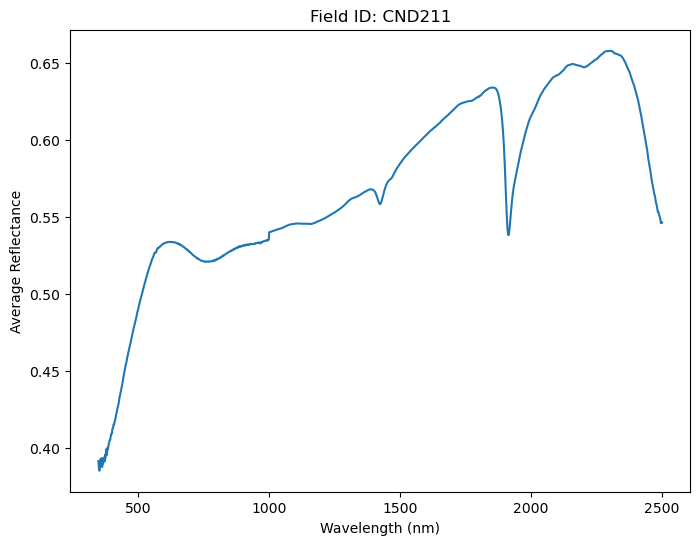

Plotted 2151 data points for Field ID: CND211


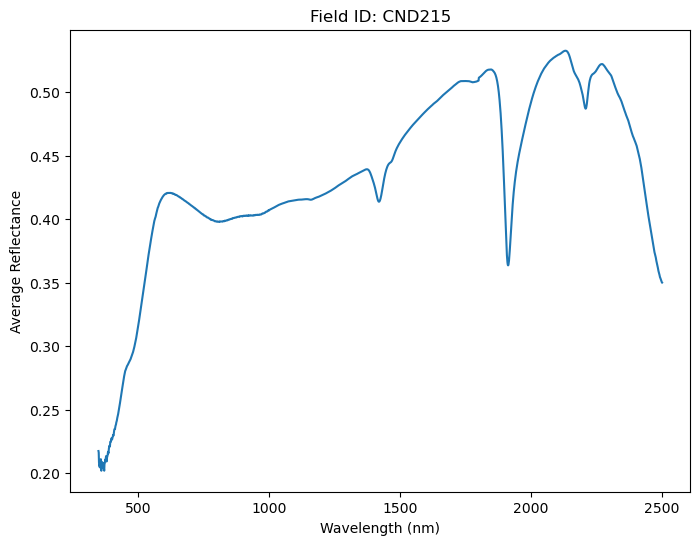

Plotted 2151 data points for Field ID: CND215


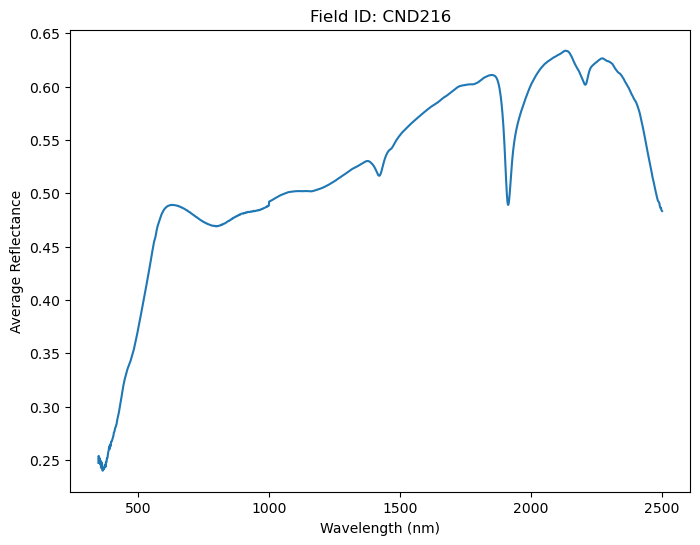

Plotted 2151 data points for Field ID: CND216


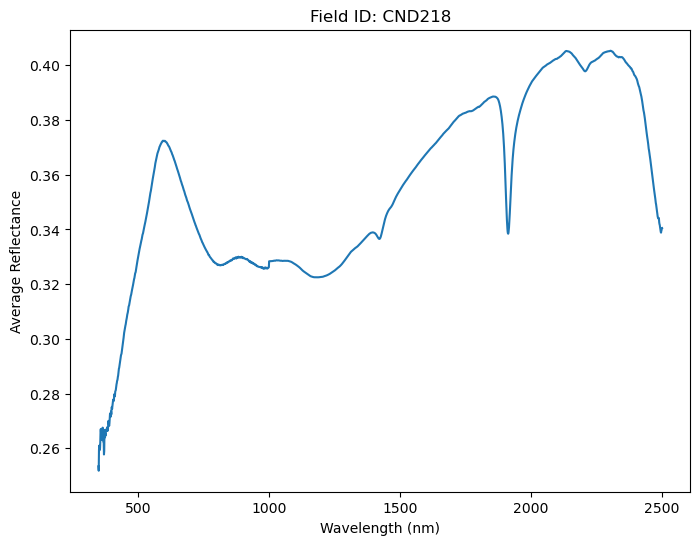

Plotted 2151 data points for Field ID: CND218


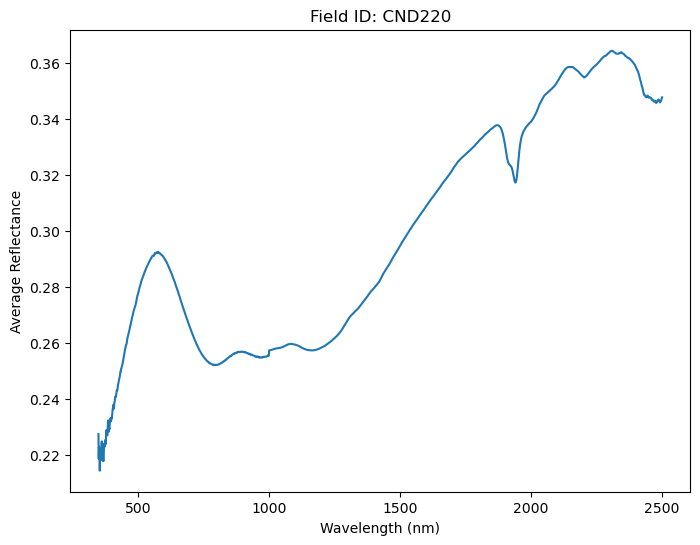

Plotted 2151 data points for Field ID: CND220


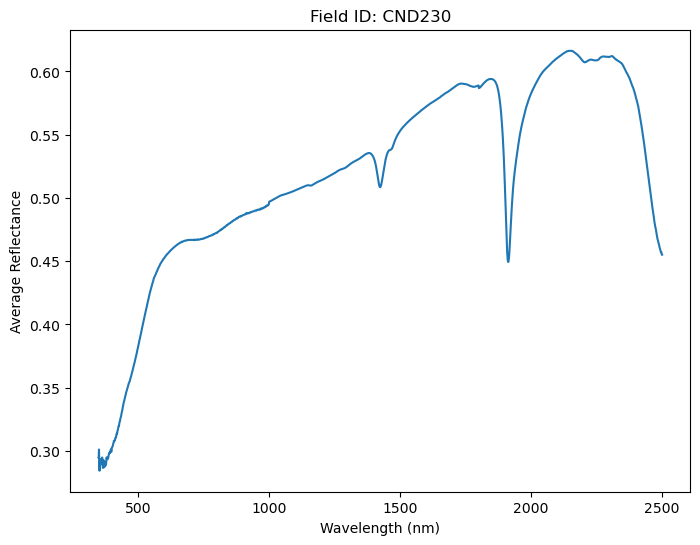

Plotted 2151 data points for Field ID: CND230


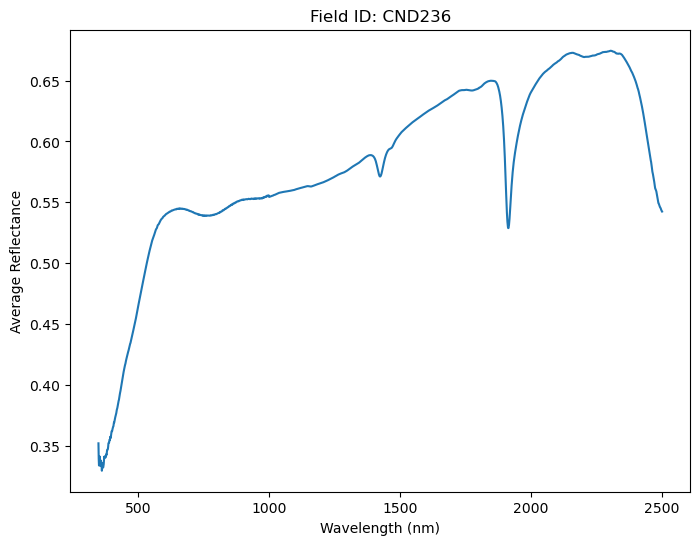

Plotted 2151 data points for Field ID: CND236


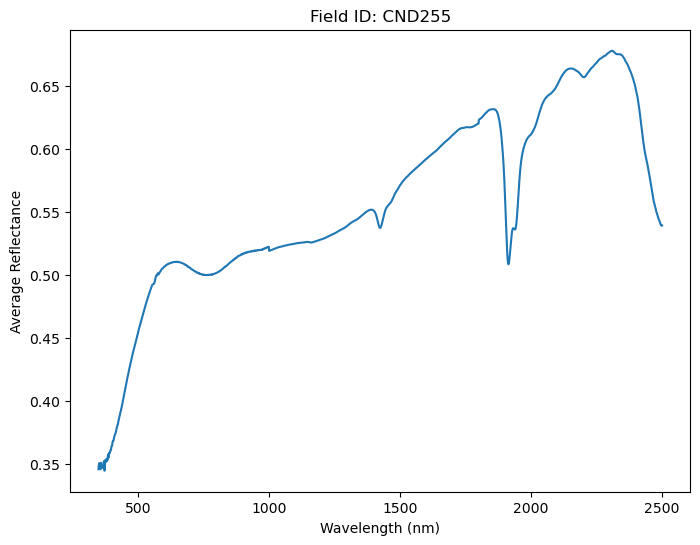

Plotted 2151 data points for Field ID: CND255


In [8]:
# Plot each individual series
for field_id in field_ids:
    # Create a new plot for each field_id
    plt.figure(figsize=(8, 6))
    
    # Find the rows corresponding to the current field_id
    rows = df[df['Field_ID'] == field_id]
    
    # Extract wavelength and reflectance data
    wavelengths = rows['Wavelength (nm)']
    reflectance = rows['Average Reflectance']
    
    # Plot the corresponding time series
    plt.plot(wavelengths, reflectance)
    
    # Set title, xlabel, and ylabel
    plt.title(f"Field ID: {field_id}")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Average Reflectance")
    
    # Show the plot for the current field_id
    plt.show()
    
    # Print the number of data points plotted for the current field_id
    print(f"Plotted {len(wavelengths)} data points for Field ID: {field_id}")

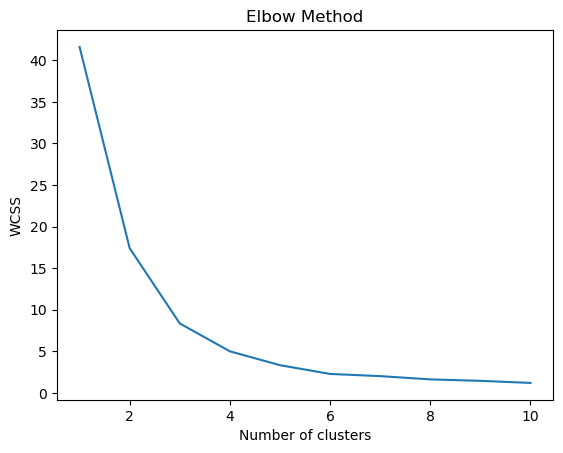

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean")
    kmeans.fit(time_series_dataset)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

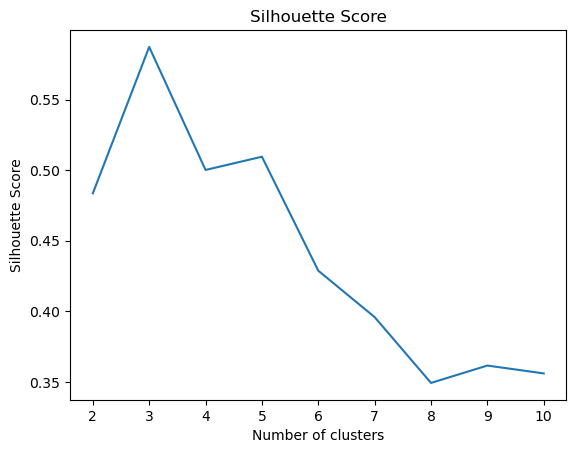

In [10]:
X_features = np.mean(time_series_dataset, axis=2)  # Example: Compute mean across timestamps

# Calculate silhouette score for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):  # Start from 2 clusters as silhouette score requires at least 2 clusters
    kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean")
    kmeans.fit(X_features)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_features, labels, metric="euclidean"))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [12]:
import matplotlib.cm as cm

C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5380702648159881


C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5872379663865862


C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5001387512268168


C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5095062364022124


C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.44582312153858117


C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.42759552901753056


C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.4038520893911353


C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.37012964654566977


C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.3835738223567566


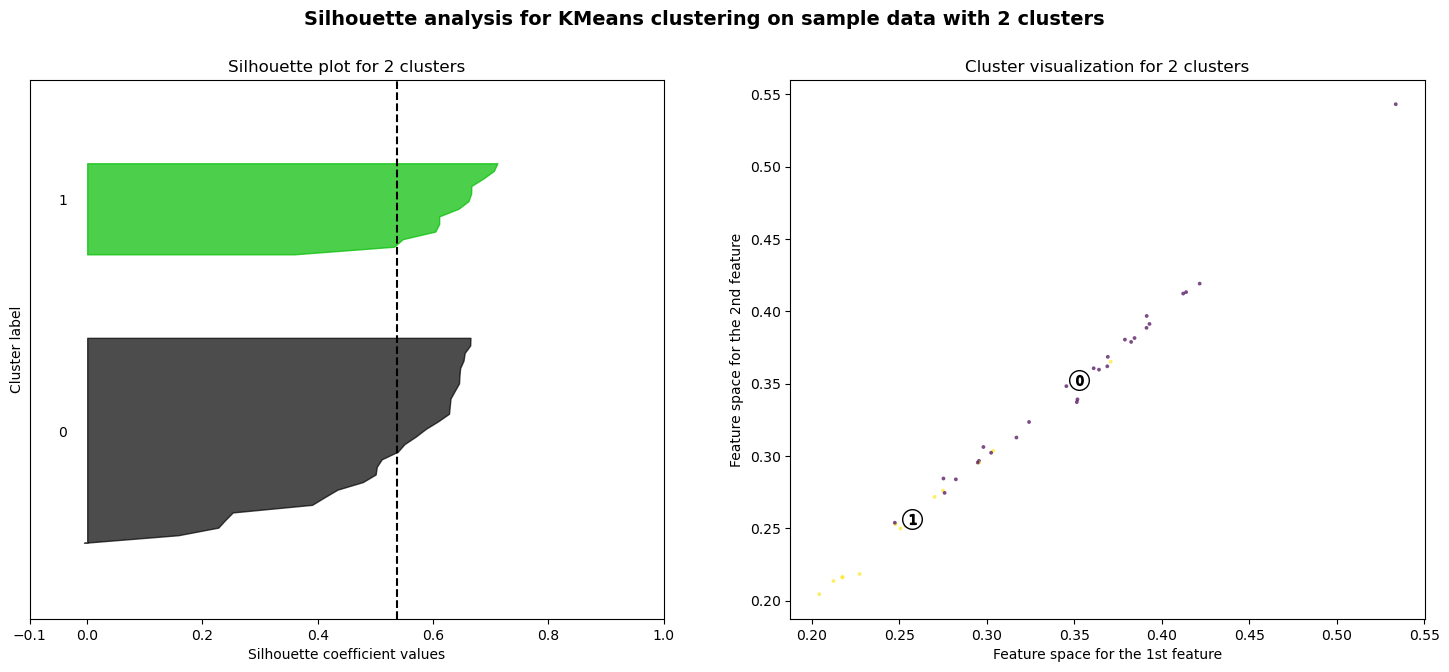

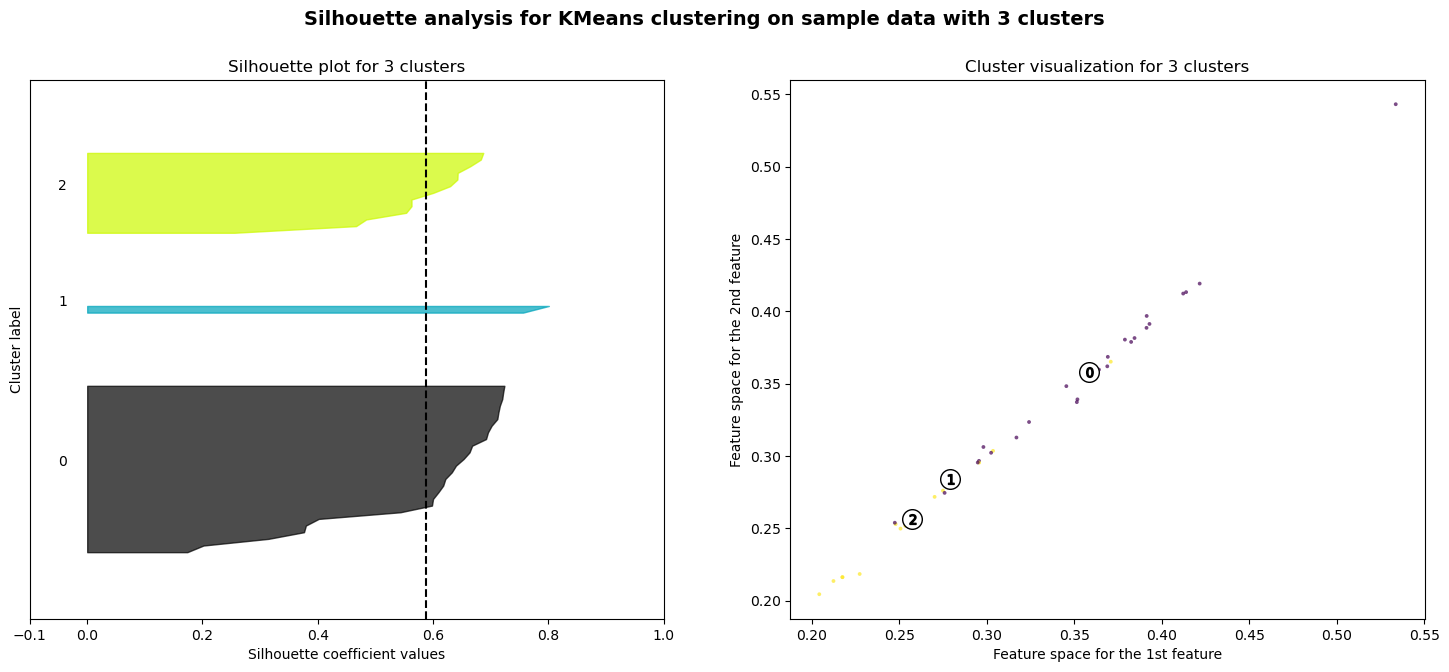

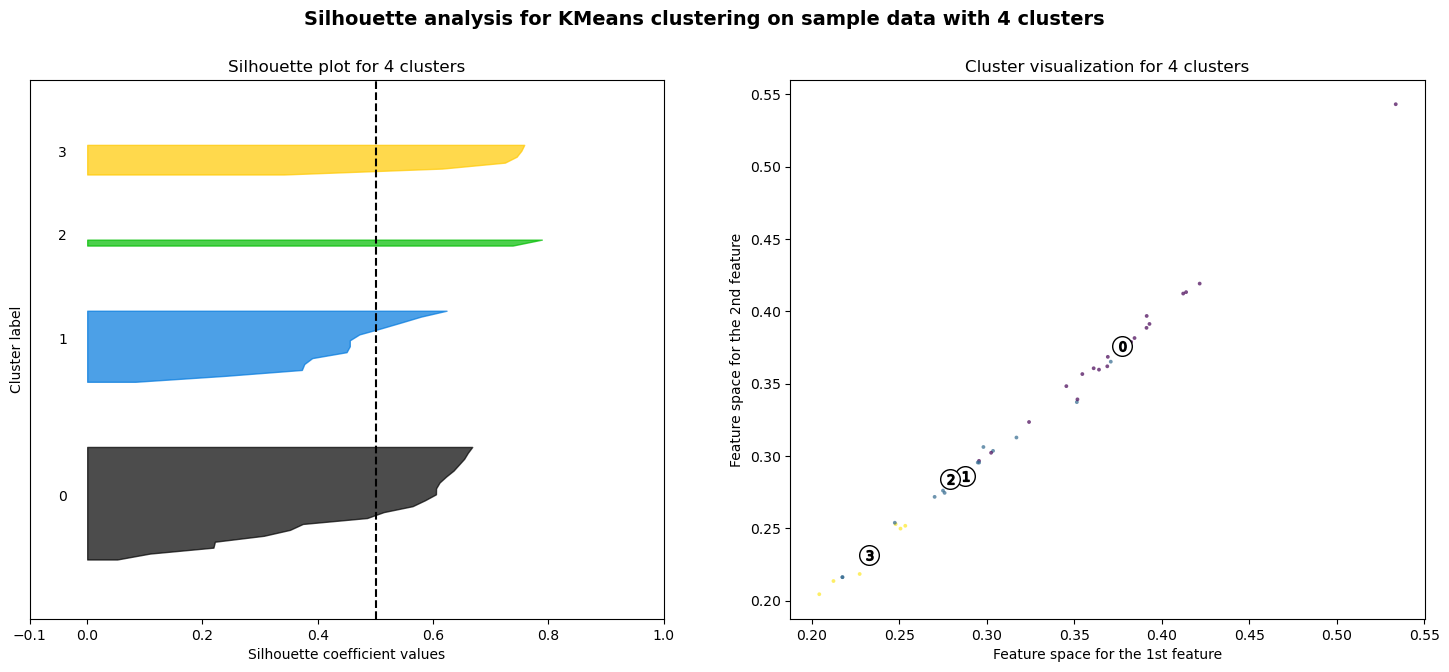

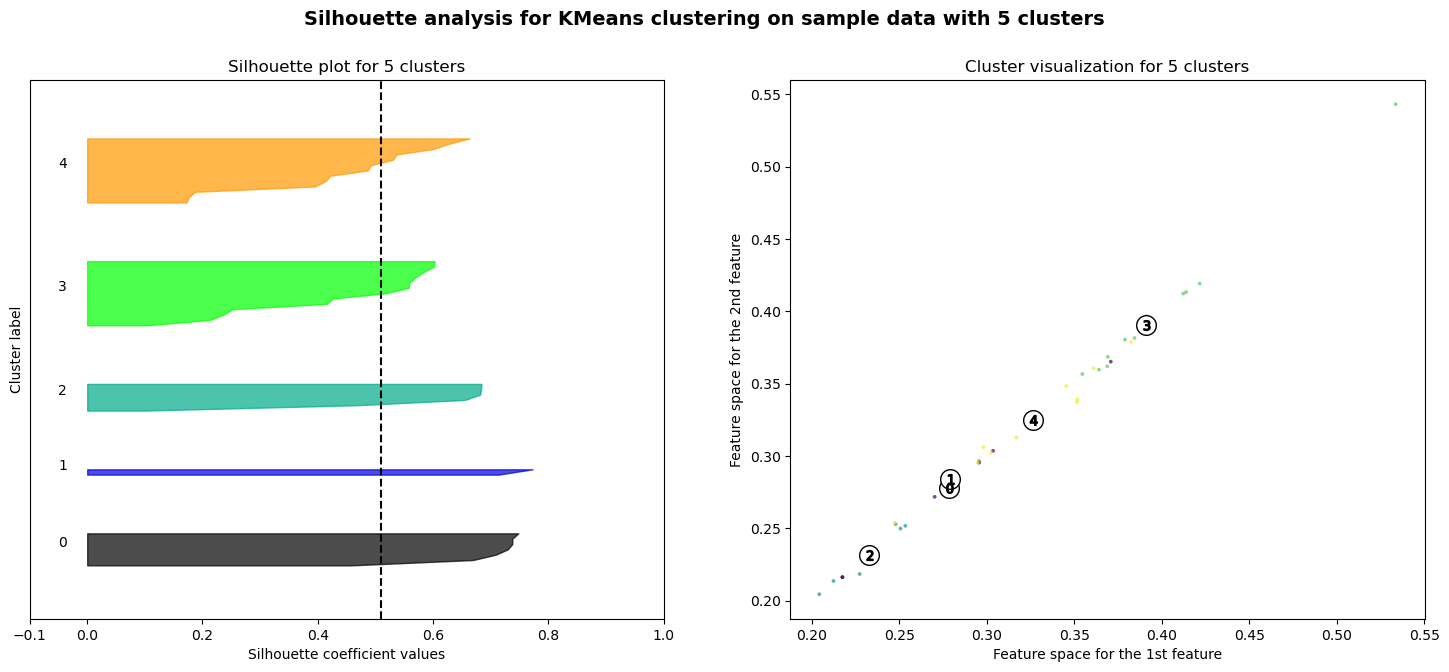

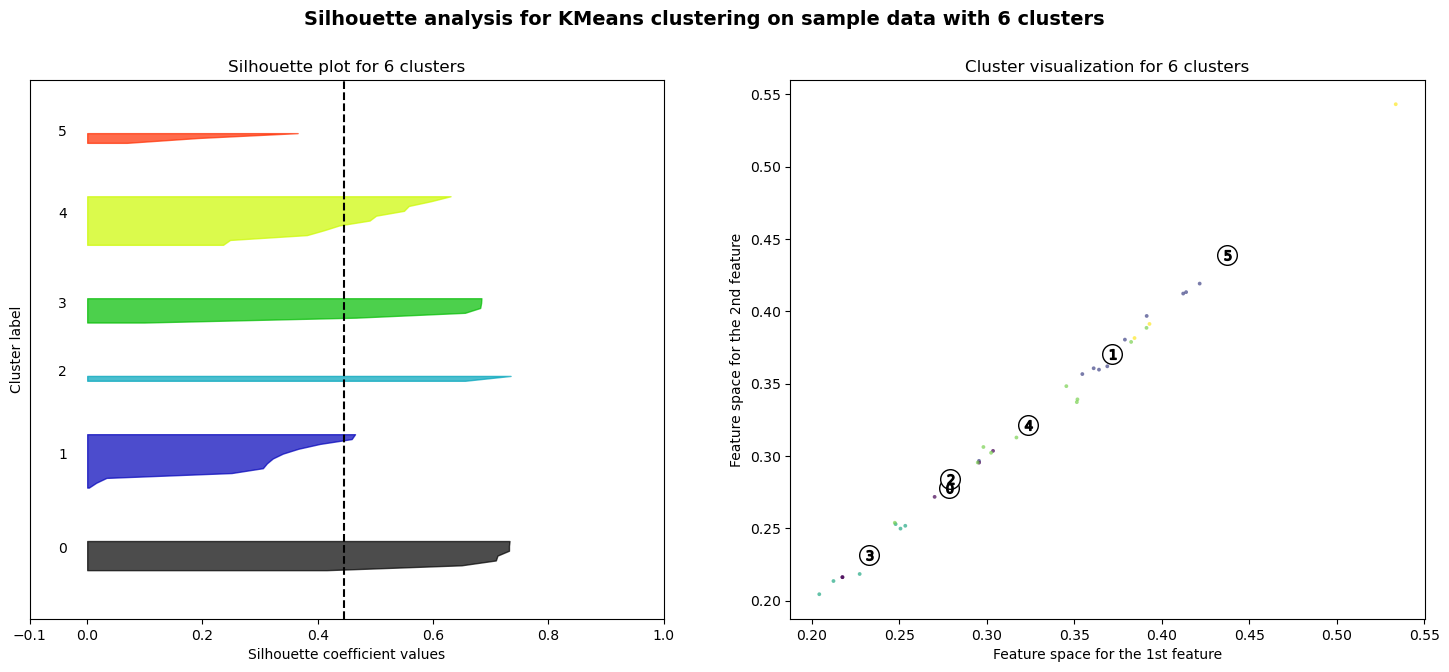

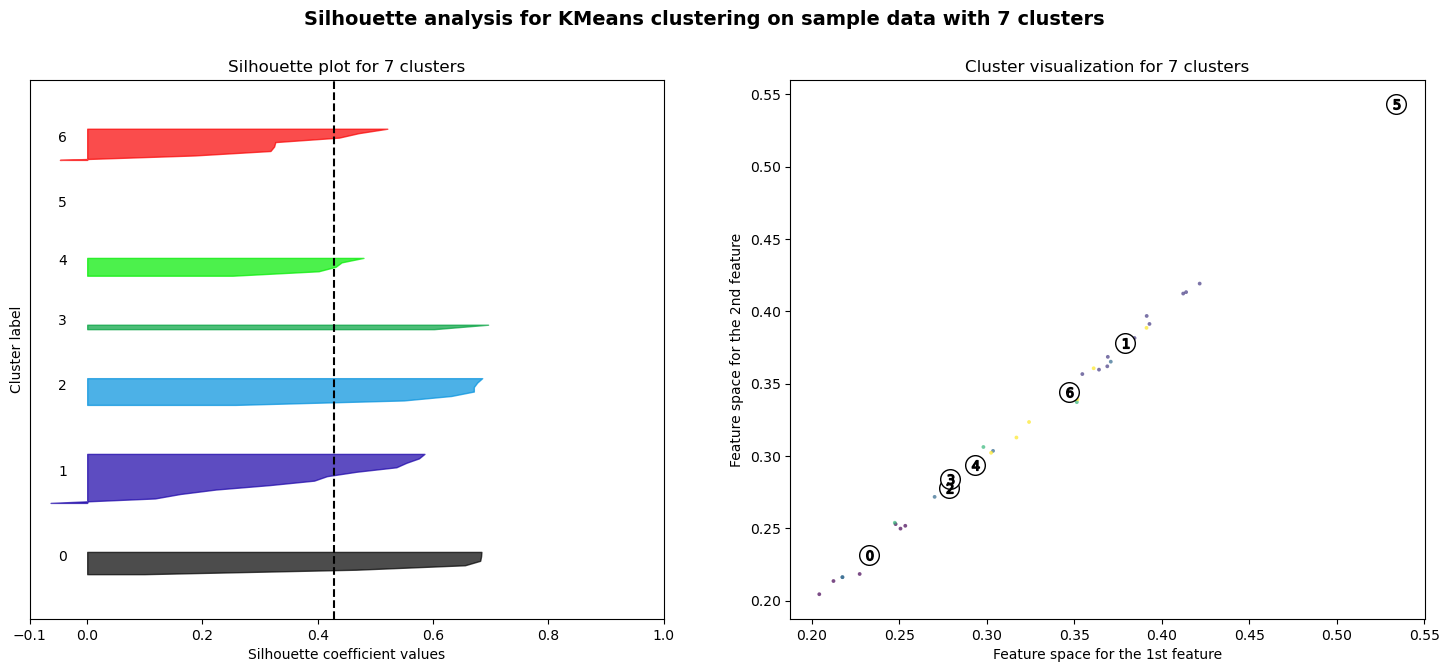

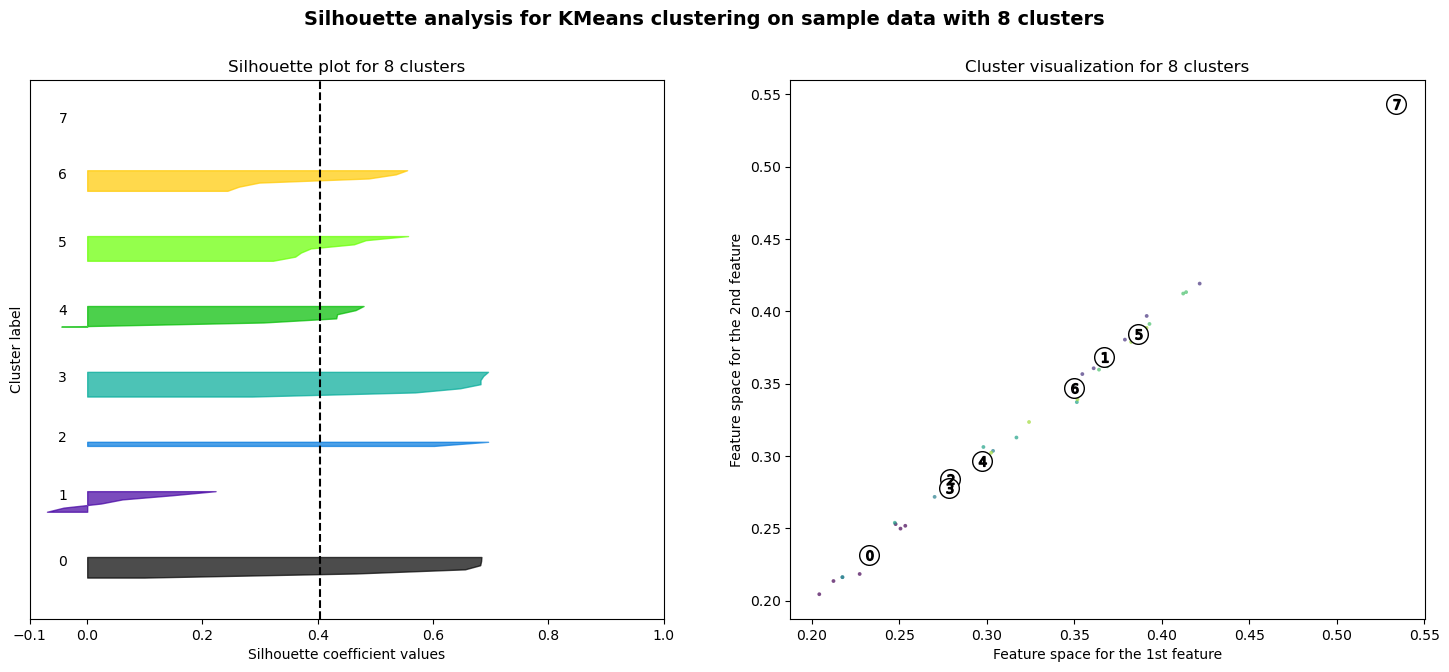

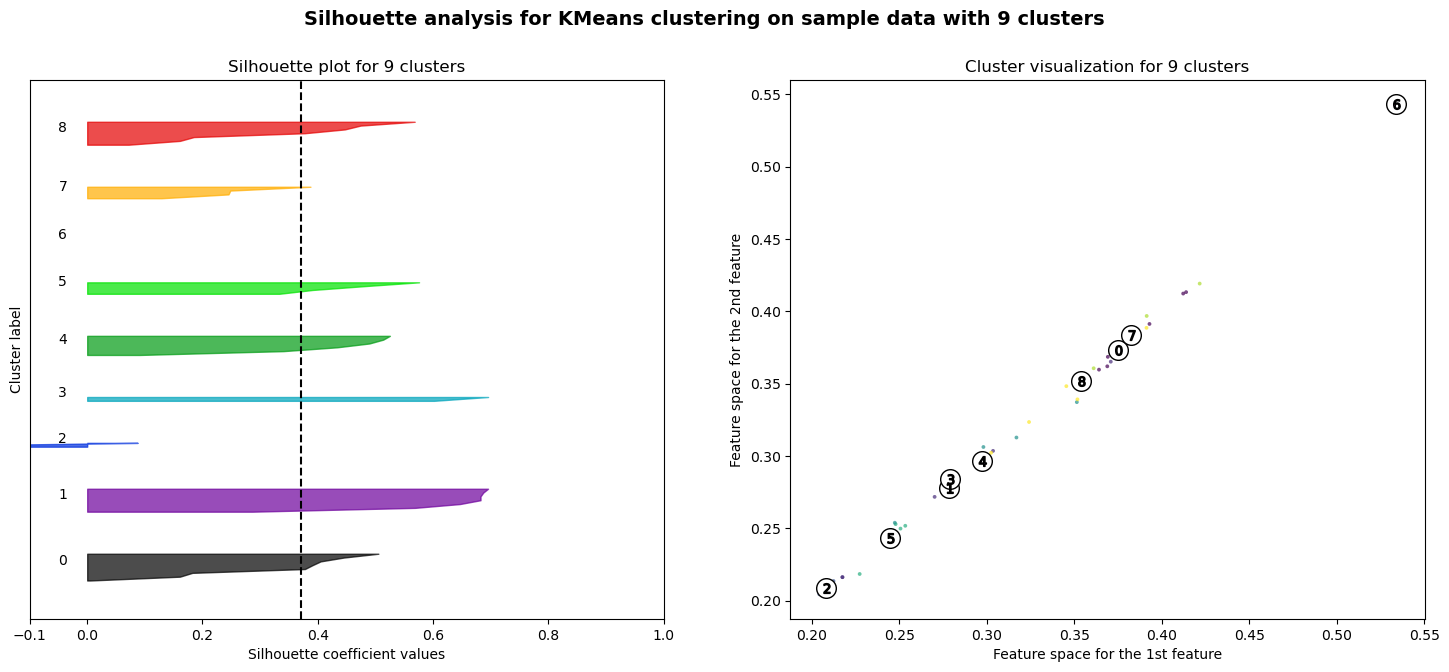

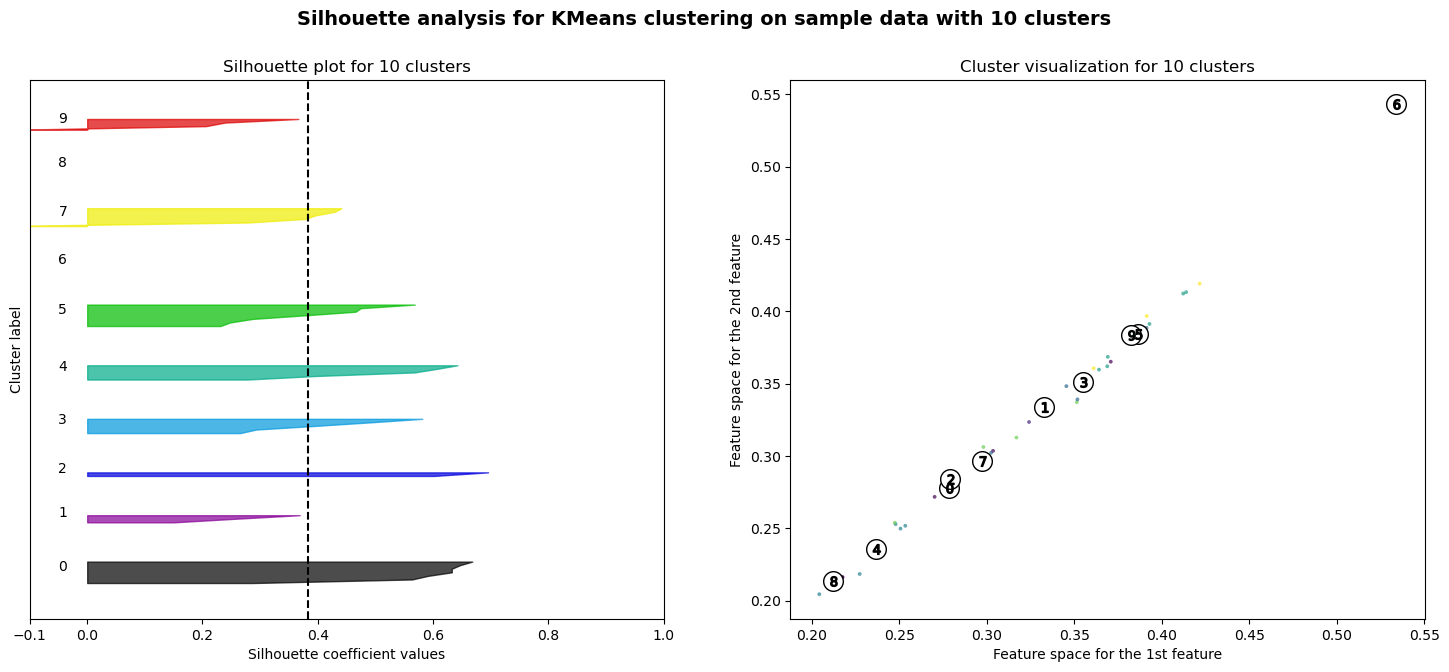

In [13]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Flatten the time series dataset
n_samples, n_series, n_timestamps = time_series_dataset.shape
X_flat = time_series_dataset.reshape((n_samples, n_series * n_timestamps))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_flat) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_flat)

    silhouette_avg = silhouette_score(X_flat, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X_flat, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

    ax1.axvline(x=silhouette_avg, color="black", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    ax1.set_title("Silhouette plot for {} clusters".format(n_clusters))
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 2nd Plot showing the actual clusters formed
    ax2.scatter(X_flat[:, 0], X_flat[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=cluster_labels, cmap='viridis', edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Cluster visualization for {} clusters".format(n_clusters))
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with {} clusters".format(n_clusters),
        fontsize=14,
        fontweight="bold",
    )

plt.show()

C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shlbs\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


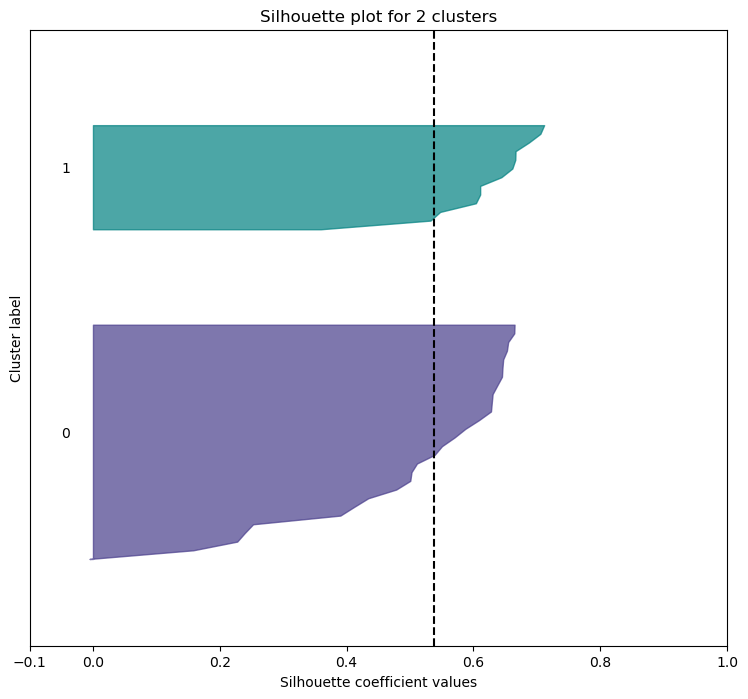

In [30]:
fig, (ax1) = plt.subplots(1, figsize=(9, 8))

# Silhouette Plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_flat) + (2 + 1) * 10])  # Assuming 2 clusters
clusterer_2 = KMeans(n_clusters=2, random_state=10)
cluster_labels_2 = clusterer_2.fit_predict(X_flat)
sample_silhouette_values = silhouette_samples(X_flat, cluster_labels_2)
silhouette_avg = silhouette_score(X_flat, cluster_labels_2)

y_lower = 10
for i in range(2):  # Assuming 2 clusters
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_2 == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = 'darkslateblue' if i == 0 else 'teal'
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="black", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax1.set_title("Silhouette plot for 2 clusters")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")


plt.show()

In [14]:
# Preprocess the data (mean-variance normalization)
X_train = TimeSeriesScalerMeanVariance().fit_transform(time_series_dataset) 

#X_train = time_series_dataset


# Define the number of clusters (k)
n_clusters = 2

# Initialize and fit the TimeSeriesKMeans model
km = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", verbose=True, random_state=42)
km.fit(X_train)

# Get cluster assignments for the data
cluster_labels = km.predict(X_train)

# Print cluster centers
print("Cluster centers:")
for i, center in enumerate(km.cluster_centers_):
    print("Cluster", i, "center:", center)

# Print cluster assignments for all samples
print("Cluster assignments for all samples:")
for i, label in enumerate(cluster_labels):
    print("Sample", i, "belongs to cluster", label)

138.409 --> 83.951 --> 79.340 --> 77.598 --> 77.226 --> 77.226 --> 
Cluster centers:
Cluster 0 center: [[-2.20622213]
 [-2.22063022]
 [-2.22218055]
 ...
 [ 0.40557517]
 [ 0.40302247]
 [ 0.40140352]]
Cluster 1 center: [[-3.10310073]
 [-3.11049081]
 [-3.14141507]
 ...
 [-0.33288647]
 [-0.33883247]
 [-0.3432122 ]]
Cluster assignments for all samples:
Sample 0 belongs to cluster 1
Sample 1 belongs to cluster 1
Sample 2 belongs to cluster 0
Sample 3 belongs to cluster 1
Sample 4 belongs to cluster 0
Sample 5 belongs to cluster 0
Sample 6 belongs to cluster 0
Sample 7 belongs to cluster 0
Sample 8 belongs to cluster 0
Sample 9 belongs to cluster 0
Sample 10 belongs to cluster 1
Sample 11 belongs to cluster 0
Sample 12 belongs to cluster 1
Sample 13 belongs to cluster 0
Sample 14 belongs to cluster 1
Sample 15 belongs to cluster 0
Sample 16 belongs to cluster 1
Sample 17 belongs to cluster 0
Sample 18 belongs to cluster 0
Sample 19 belongs to cluster 1
Sample 20 belongs to cluster 1
Sample 21

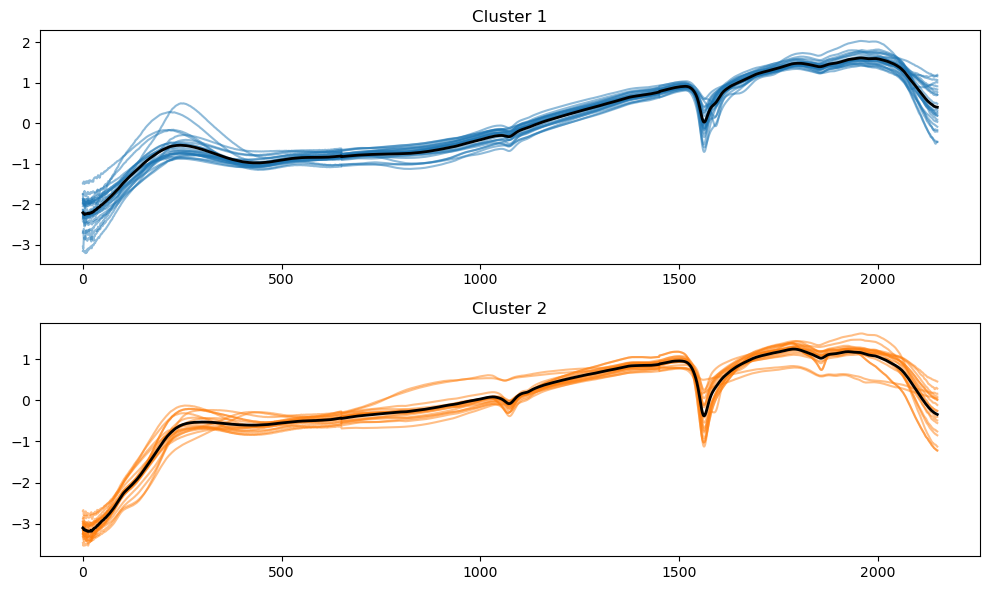

In [15]:
# Plot original time series colored by cluster
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.subplot(n_clusters, 1, i + 1)
    for j in range(len(cluster_labels)):
        if cluster_labels[j] == i:
            plt.plot(X_train[j].ravel(), color='C'+str(i), alpha=0.5)
    plt.plot(km.cluster_centers_[i].ravel(), color='k', linewidth=2)
    plt.title(f'Cluster {i+1}')
plt.tight_layout()
plt.show()

In [16]:
# Create a DataFrame to store cluster assignments with Field_ID
cluster_df = pd.DataFrame({'Field_ID': field_ids, 'Cluster': cluster_labels})

# Merge cluster assignments with the original DataFrame based on Field_ID
df_with_clusters = df.merge(cluster_df, on='Field_ID')

# Print cluster centers
print("Cluster centers:")
for i, center in enumerate(km.cluster_centers_):
    print("Cluster", i, "center:", center)

# Print cluster assignments for all samples
print("Cluster assignments for all samples:")
for i, label in enumerate(cluster_labels):
    print("Sample", i, "belongs to cluster", label)

# Print DataFrame with cluster assignments
print(df_with_clusters)

Cluster centers:
Cluster 0 center: [[-2.20622213]
 [-2.22063022]
 [-2.22218055]
 ...
 [ 0.40557517]
 [ 0.40302247]
 [ 0.40140352]]
Cluster 1 center: [[-3.10310073]
 [-3.11049081]
 [-3.14141507]
 ...
 [-0.33288647]
 [-0.33883247]
 [-0.3432122 ]]
Cluster assignments for all samples:
Sample 0 belongs to cluster 1
Sample 1 belongs to cluster 1
Sample 2 belongs to cluster 0
Sample 3 belongs to cluster 1
Sample 4 belongs to cluster 0
Sample 5 belongs to cluster 0
Sample 6 belongs to cluster 0
Sample 7 belongs to cluster 0
Sample 8 belongs to cluster 0
Sample 9 belongs to cluster 0
Sample 10 belongs to cluster 1
Sample 11 belongs to cluster 0
Sample 12 belongs to cluster 1
Sample 13 belongs to cluster 0
Sample 14 belongs to cluster 1
Sample 15 belongs to cluster 0
Sample 16 belongs to cluster 1
Sample 17 belongs to cluster 0
Sample 18 belongs to cluster 0
Sample 19 belongs to cluster 1
Sample 20 belongs to cluster 1
Sample 21 belongs to cluster 0
Sample 22 belongs to cluster 0
Sample 23 belon

In [ ]:
df_with_clusters.head()

In [ ]:
df_with_clusters.to_csv(r'C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\SRS_Thesis_ShareFolder\_DATA\_AOIs\_CORNUDAS\_FIELD SPEC\Rock_Type_March2024\Igneous_Clusters_2.csv', index=False)